In [22]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [23]:
df= pd.read_csv(r"SampleSuperstore.csv")
df.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [24]:
df.shape

(9994, 13)

In [25]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [26]:
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
9989    False
9990    False
9991    False
9992    False
9993    False
Length: 9994, dtype: bool

In [27]:
df = df.drop(['Country'], axis = 1)
df = df.drop(['Postal Code'], axis = 1)

In [28]:
df.head()

,Ship Mode,Segment,City,State,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,Henderson,Kentucky,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,Henderson,Kentucky,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,Los Angeles,California,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,Fort Lauderdale,Florida,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,Fort Lauderdale,Florida,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


<Axes: xlabel='Ship Mode', ylabel='count'>

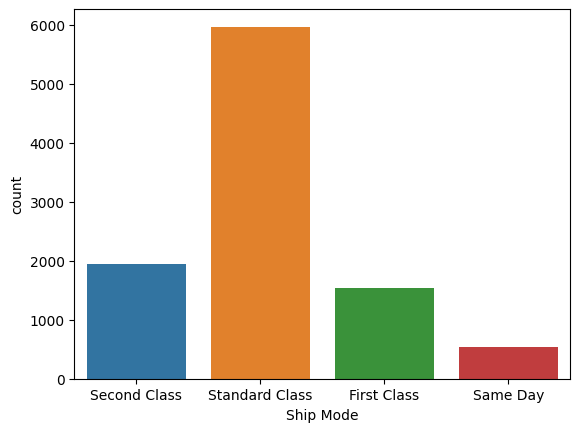

In [29]:
sns.countplot(x=df['Ship Mode'])

Text(0, 0.5, 'Sales')

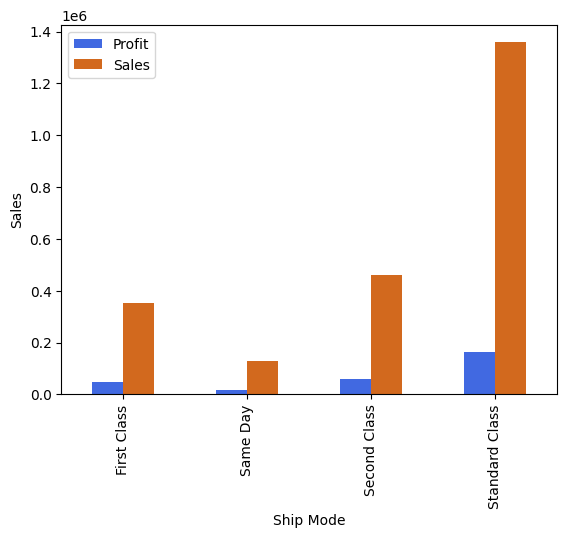

In [30]:
df.groupby('Ship Mode')[['Profit', 'Sales']].sum().plot.bar(color=['royalblue','chocolate'])
plt.ylabel('Sales')

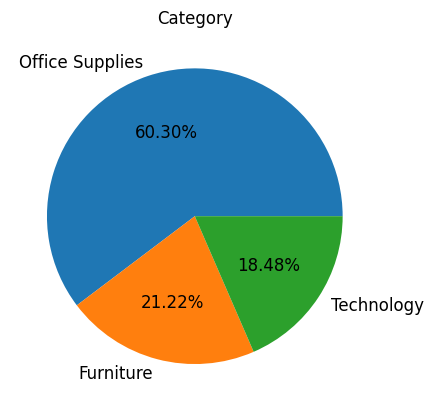

In [31]:
tp = {'fontsize': 12}
plt.title("Category")
#piechart is in matplotlib
plt.pie(df['Category'].value_counts(), labels = df['Category'].value_counts().index, autopct='%1.2f%%', textprops=tp)
plt.show()

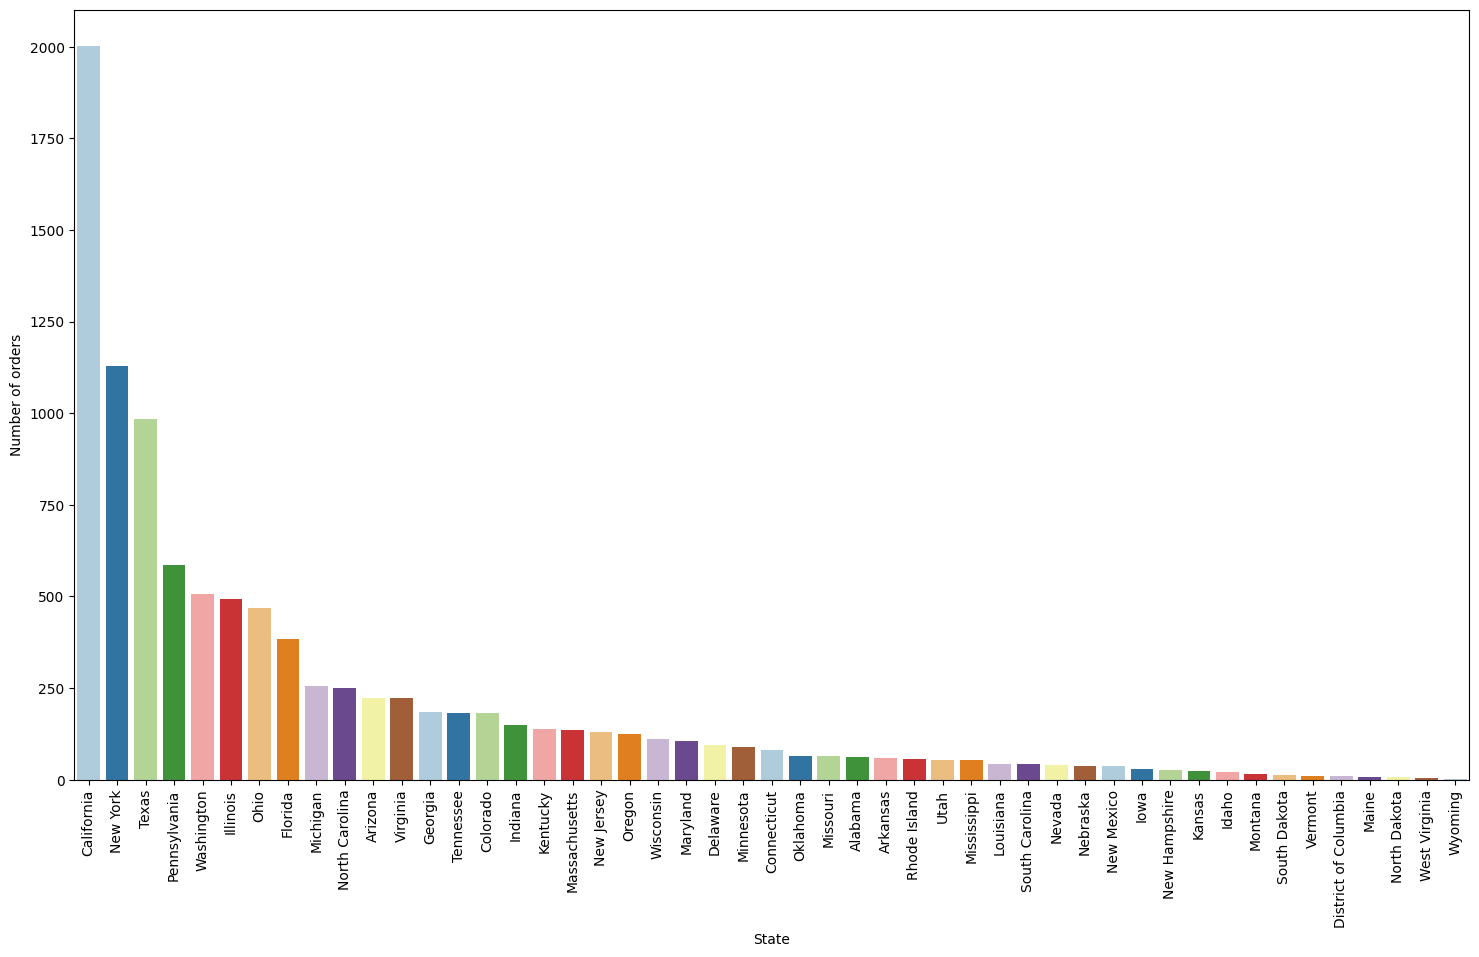

In [32]:
plt.figure(figsize=(18,10))
sns.countplot(x="State", data=df, palette='Paired', order=df['State'].value_counts().index)
plt.xticks(rotation=90)
plt.ylabel('Number of orders')
plt.show()

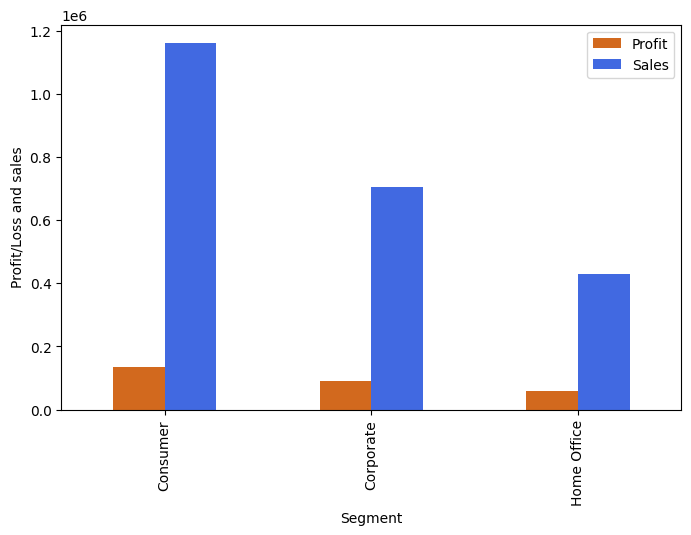

In [33]:
df.groupby('Segment')[['Profit','Sales']].sum().plot.bar(color=['chocolate','royalblue'], figsize=(8,5))
plt.ylabel('Profit/Loss and sales')
plt.show()
#Highest sale and profit is in Consumer segment as compared to corporate and home office.

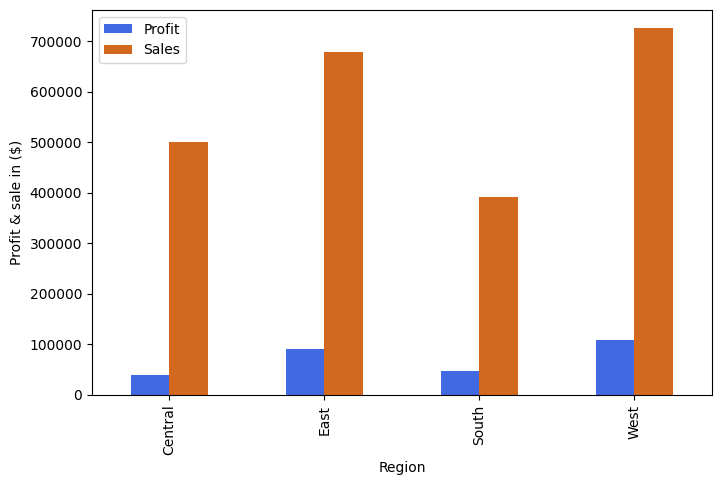

In [34]:
df.groupby('Region')[['Profit','Sales']].sum().plot.bar(color=['royalblue','chocolate'], figsize=(8,5))
plt.ylabel('Profit & sale in ($)')
plt.show()
#Highest sale in West region as compared to other region,

Text(0.5, 1.0, 'Count of ship mode by region and ship mode')

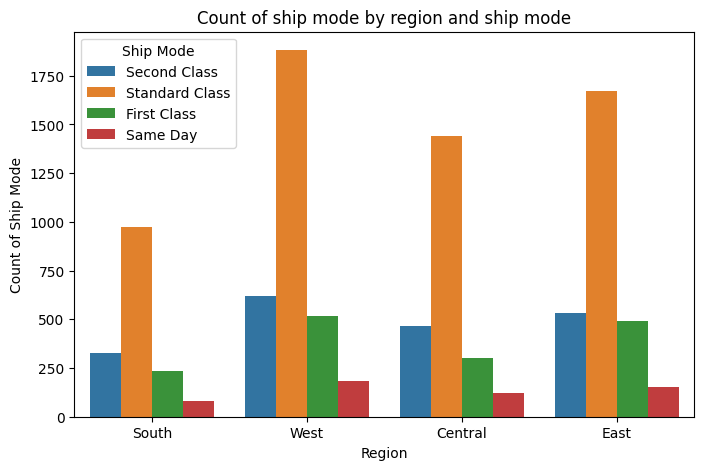

In [35]:
plt.figure(figsize=(8,5))
sns.countplot(x='Region',hue='Ship Mode',data=df)
plt.ylabel('Count of Ship Mode')
plt.title('Count of ship mode by region and ship mode')

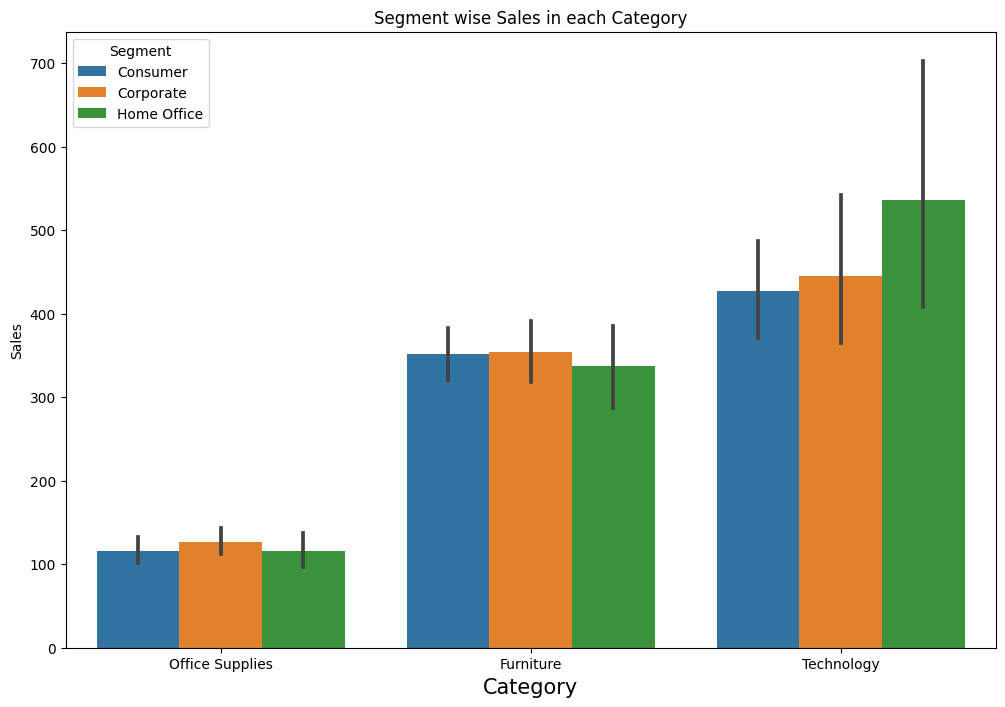

In [36]:
'''
Shipment method used in each region is mostly Standard class, so obviously there is maximum sale in this shipment method.
Maximum category is of office suppliers where as maximum sale and profit is in technology.
There is maximum sale in phone category whereas maximum profit in Chairs category.
Maximum order is in California that is around 2000.
Highest sale and profit is in Consumer segment as compared to corporate and home office.
Highest sale in West region as compared to other region, Standard class is used in each region where as First class is same in West and East.
There is a negative profit in Tables.
'''


plt.figure(figsize=(12,8))
plt.title('Segment wise Sales in each Category')
sns.barplot(x='Category',y='Sales',data=df,hue='Segment',order=df['Category'].value_counts().index)
plt.xlabel('Category',fontsize=15)
plt.show()



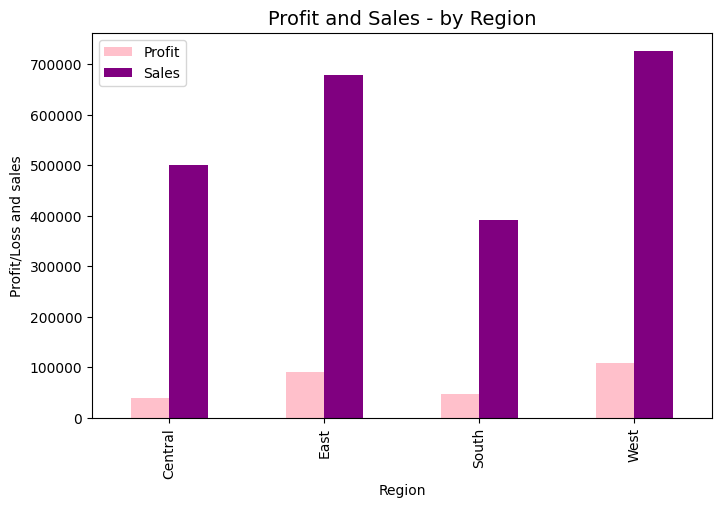

In [37]:
df.groupby('Region')[['Profit','Sales']].sum().plot.bar(color=['pink','purple'],figsize=(8,5))
plt.ylabel('Profit/Loss and sales')
plt.title('Profit and Sales - by Region', fontsize=14)
plt.show() 

C:\Users\MyVampire\AppData\Local\Temp\ipykernel_3316\263230119.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  furn = df[df.Category == 'Furniture'].groupby('Sub-Category').sum().sort_values('Profit', ascending=False).iloc[:, [-1]]


TypeError: barplot() takes from 0 to 1 positional arguments but 2 positional arguments (and 1 keyword-only argument) were given

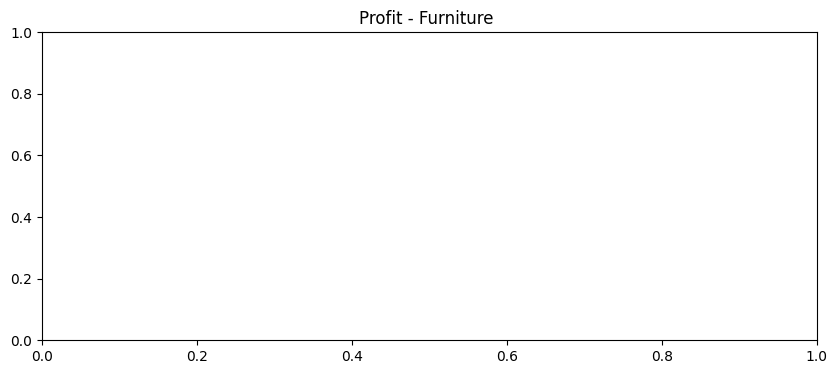

In [38]:
furn = df[df.Category == 'Furniture'].groupby('Sub-Category').sum().sort_values('Profit', ascending=False).iloc[:, [-1]]
plt.figure(figsize=(10,4))
plt.title('Profit - Furniture ')
sns.barplot(furn.Profit, furn.index,palette='rocket')
plt.show()
#There is a negative profit in Tables.

C:\Users\MyVampire\AppData\Local\Temp\ipykernel_3316\1729888629.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  furn = df[df.Category == 'Office Supplies'].groupby('Sub-Category').sum().sort_values('Profit', ascending=False).iloc[:, [-1]]


TypeError: barplot() takes from 0 to 1 positional arguments but 2 positional arguments (and 1 keyword-only argument) were given

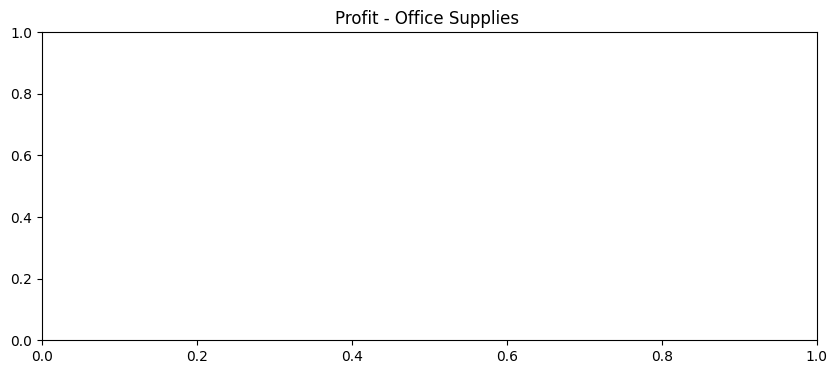

In [39]:
furn = df[df.Category == 'Office Supplies'].groupby('Sub-Category').sum().sort_values('Profit', ascending=False).iloc[:, [-1]]
plt.figure(figsize=(10,4))
plt.title('Profit - Office Supplies ')
sns.barplot( furn.Profit, furn.index,palette='rocket')
plt.show()
#There is a

C:\Users\MyVampire\AppData\Local\Temp\ipykernel_3316\140294919.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  furn = df[df.Category == 'Technology'].groupby('Sub-Category').sum().sort_values('Profit', ascending=False).iloc[:, [-1]]


TypeError: barplot() takes from 0 to 1 positional arguments but 2 positional arguments (and 1 keyword-only argument) were given

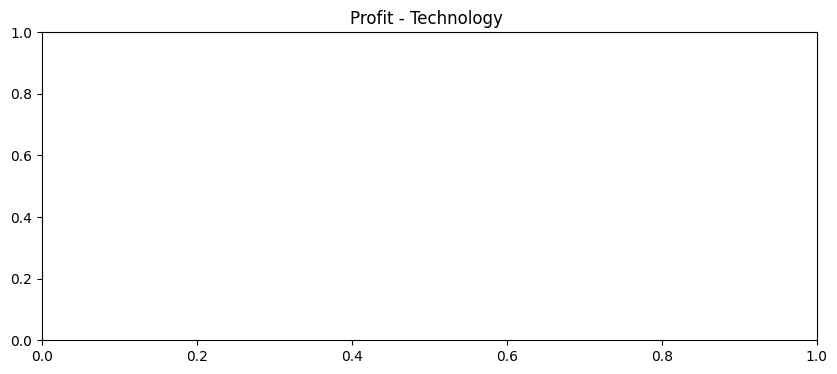

In [40]:
furn = df[df.Category == 'Technology'].groupby('Sub-Category').sum().sort_values('Profit', ascending=False).iloc[:, [-1]]
plt.figure(figsize=(10,4))
plt.title('Profit - Technology ')
sns.barplot( furn.Profit, furn.index,palette='rocket')
plt.show()

In [ ]:
summary = pd.DataFrame({'Profit':df.Quantity[df.Profit > 0].sum(), 
                        'No-Profit':df.Quantity[df.Profit == 0].sum(), 
                        'Loss':df.Quantity[(df.Profit) < 0].sum()},
                       index={'Count'}).T
plt.title('Overall Sales Summary', fontsize=20)
summary.Count.plot.pie(autopct='%1.2f%%',figsize=(7,7), label='Percentage', 
                       textprops = {"fontsize":15}, shadow=False, explode=(0.08,0.05,0))
plt.show() 
#80.74% of sales resulted in profit and 18.59% of sales result in loss